In [98]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
from scipy.signal import argrelextrema
import os

import sys
sys.path.append('../../')
from cad.calc.geo import Geo
from cad.calc.conv import freq_to_note_and_cent, note_name
import pandas as pd
import seaborn as sns

import json

# Create Target Function

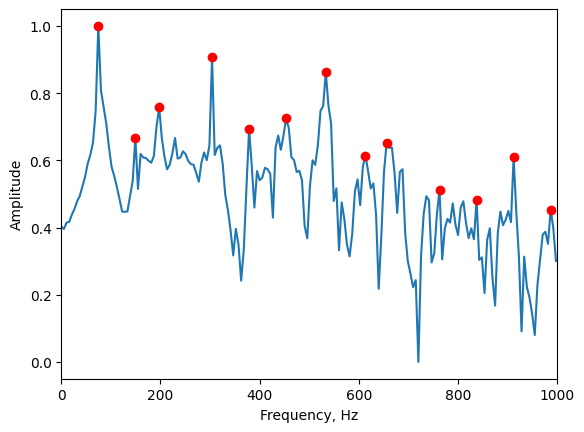

In [112]:
# analyze peaks from the record

def do_fft(infile, size=-1, maxfreq=1000):
    sampFreq, sound = wavfile.read(infile)
    
    if len(sound.shape)==2:
        signal = sound[:,0]
    else:
        signal = sound

    if size == -1:
        size=len(signal)
    
    fft_spectrum = np.fft.rfft(signal, n=size)
    freq = np.fft.rfftfreq(size, d=1./sampFreq)
    fft_spectrum_abs = np.abs(fft_spectrum)
 
    i=0
    while i<len(freq) and freq[i]<=maxfreq:
        i+=1
    freq = freq[0:i]
    fft_spectrum_abs = fft_spectrum_abs[0:i]

    return freq, fft_spectrum_abs

def get_harmonic_maxima(freq, spectrum, min_freq=60):
    i=0
    maxima = []
    base_freq = min_freq
    while i*base_freq<1000:
        if i==0:
            window = freq>min_freq
        else:
            window = (freq>(i+0.5)*base_freq) & (freq<base_freq*(i+1.5))

        if window.astype(int).sum() == 0:
            break
        window_f = freq[window]
        window_s = spectrum[window]
        maxi = np.argmax(window_s)
        max_f = window_f[maxi]
        if i==0:
            base_freq=max_f

        maxima.append(max_f)
        i+=1
    return maxima

infile = "tamaki/tamaki_vorlage_short.wav"
freq, spectrum = do_fft(infile)
spectrum = np.log2(spectrum)
spectrum -= spectrum.min()
spectrum /= spectrum.max()

maxima_freqs = get_harmonic_maxima(freq, spectrum)
maxima_indizes = [np.argmin(np.abs(freq-f)) for f in maxima_freqs]
maxima_vols = spectrum[maxima_indizes]

#for m in maxima:
#    plt.axvline(x=m, color="red")

plt.plot(freq, spectrum, label="sound")
plt.plot(maxima_freqs, maxima_vols, marker='o', color='r', ls='')

plt.xlim((0,1000))

plt.xlabel("Frequency, Hz")
plt.ylabel("Amplitude")
plt.show()

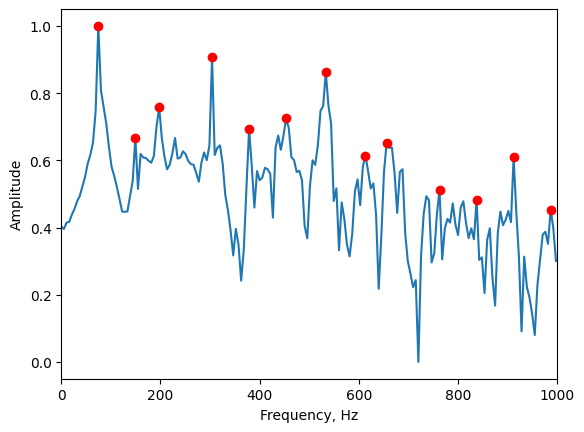

In [113]:
def get_harmonic_maxima(freq, spectrum, min_freq=60):
    i=0
    maxima = []
    base_freq = min_freq
    while i*base_freq<1000:
        if i==0:
            window = freq>min_freq
        else:
            window = (freq>(i+0.5)*base_freq) & (freq<base_freq*(i+1.5))

        if window.astype(int).sum() == 0:
            break
        window_f = freq[window]
        window_s = spectrum[window]
        maxi = np.argmax(window_s)
        max_f = window_f[maxi]
        if i==0:
            base_freq=max_f

        maxima.append(max_f)
        i+=1
    return maxima

infile = "tamaki/tamaki_vorlage_short.wav"
freq, spectrum = do_fft(infile)
spectrum = np.log2(spectrum)
spectrum -= spectrum.min()
spectrum /= spectrum.max()

maxima_freqs = get_harmonic_maxima(freq, spectrum)
maxima_indizes = [np.argmin(np.abs(freq-f)) for f in maxima_freqs]
maxima_vols = spectrum[maxima_indizes]

#for m in maxima:
#    plt.axvline(x=m, color="red")

plt.plot(freq, spectrum, label="sound")
plt.plot(maxima_freqs, maxima_vols, marker='o', color='r', ls='')

plt.xlim((0,1000))

plt.xlabel("Frequency, Hz")
plt.ylabel("Amplitude")
plt.show()

In [110]:
for i in range(len(maxima_freqs)):
    print(i, maxima_freqs[i])

priorities=[0,5,6]

0 84.48275862068965
1 165.29235382308846
2 249.7751124437781
3 330.5847076461769
4 415.0674662668666
5 499.5502248875562
6 587.7061469265367
7 668.5157421289356
8 741.9790104947526
9 837.4812593703149
10 914.6176911544228
11 991.7541229385307


In [109]:
reference={
    "freq": list(np.log2(maxima_freqs)),
    "amp": list(maxima_vols),
    "priorities": priorities
}
print(json.dumps(reference))

{"freq": [6.400585038762361, 7.368876179035023, 7.964485923955688, 8.368876179035023, 8.697202045120536, 8.964485923955687, 9.19895117759271, 9.384817722904044, 9.535234565457143, 9.709913096870089, 9.83702501477343, 9.95383867975618], "amp": [1.0, 0.6073456474120418, 0.7250740308214233, 0.5819491541103495, 0.5757528442270442, 0.7646716809346981, 0.7289892200366962, 0.4648478386222508, 0.6236959507896652, 0.49612524062788294, 0.39607427089021596, 0.5221732266032565], "priorities": [0, 5, 6]}


In [102]:
# loss function

from cad.calc.loss import LossFunction

def get_harmonic_maxima(freq, spectrum, min_freq=60):
    i=0
    maxima = []
    base_freq = min_freq
    while i*base_freq<1000:
        if i==0:
            window = freq>min_freq
        else:
            window = (freq>(i+0.5)*base_freq) & (freq<base_freq*(i+1.5))

        if window.astype(int).sum() == 0:
            break
        window_f = freq[window]
        window_s = spectrum[window]
        maxi = np.argmax(window_s)
        max_f = window_f[maxi]
        if i==0:
            base_freq=max_f

        maxima.append(max_f)
        i+=1
    return maxima

class TamakiLoss(LossFunction):

    def __init__(self):
        r = {"freq": [6.222348803098145, 7.222348803098145, 7.62444724666949, 8.247883895205282, 8.564741000545222, 8.824384817178242, 9.058850070815264, 9.260483931984917, 9.35750838637978, 9.57486521781893, 9.709614629932167, 9.832846395926438, 9.946375341556852], "amp": [1.0, 0.665887763091164, 0.7577392696435099, 0.9062009432919204, 0.691840175904513, 0.7248412659700325, 0.8622095761620474, 0.6143027649133844, 0.6522205113018933, 0.5119276562318105, 0.4817590538517138, 0.609030374065755, 0.45247731824522186], "priorities": [5, 6]}
        self.reference_freq = np.array(r["freq"])
        self.reference_amp = np.array(r["amp"])
        self.reference_priorities = np.array(r["priorities"])
        
    def get_loss(self, geo):
        
        gs = geo.get_cadsd().get_ground_spektrum()
        computed_freqs = np.array(list(gs.keys()))
        computed_amp = np.array(list(gs.values()))
        peaks = get_harmonic_maxima(computed_freqs, computed_amp)
        peaks = np.log2(peaks)
        computed_freqs = np.log2(computed_freqs)
        computed_amp -= computed_amp.min()
        computed_amp /= computed_amp.max()
        
        tuning_loss = 0
        amp_loss = 0
        priority_amp_loss = 0
        fundamental_loss = 0
        
        for i in range(len(self.reference_freq)):
            mini = np.argmin(np.abs(peaks-self.reference_freq[i]))
            closest_freq = peaks[mini]
            closest_freq_index = np.argmin(np.abs(computed_freqs-closest_freq))
            closest_amp = computed_amp[closest_freq_index]
            
            _tuning_loss = np.sqrt(np.power(closest_freq-self.reference_freq[i], 2))
            
            if i in self.reference_priorities:
                priority_amp_loss += 1-closest_amp
                tuning_loss += _tuning_loss*3
            else:
                amp_loss += np.sqrt(np.power(closest_amp-self.reference_amp[i], 2))
                tuning_loss += _tuning_loss
                
            if i==0:
                fundamental_loss = _tuning_loss

        # peak_amps = computed_freqs[peaks]
        
               
        tuning_loss /= len(self.reference_freq)
        amp_loss /= len(self.reference_freq)

        # geo.get_cadsd().release_memory()
        
        tuning_loss *= 5
        fundamental_loss *= 5
        amp_loss *= 5

        return {
            "loss": fundamental_loss + tuning_loss + amp_loss + priority_amp_loss,
            "fundamental_loss": fundamental_loss,
            "tuning_loss": tuning_loss,
            "amp_loss": amp_loss,
            "priority_amp_loss": priority_amp_loss
        }

geo = [[0,32], [800,32], [900,38], [970,42], [1050, 40], [1180, 48], [1350, 60], [1390, 68], [1500, 72]]
geo=Geo(geo)
TamakiLoss().get_loss(geo)

{'loss': 1.759768019122585,
 'fundamental_loss': 0.16262122109063526,
 'tuning_loss': 0.35190845254717007,
 'amp_loss': 0.5149643982192857,
 'priority_amp_loss': 0.7302739472654939}

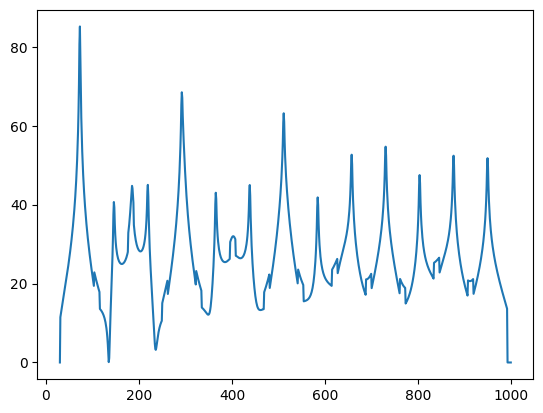

In [59]:
geo = [[0,32], [800,32], [900,38], [970,42], [1050, 40], [1180, 48], [1350, 60], [1390, 68], [1500, 72]]
geo=Geo(geo)
gs=geo.get_cadsd().get_ground_spektrum()
plt.plot(gs.keys(), gs.values())

<AxesSubplot: xlabel='x', ylabel='y'>

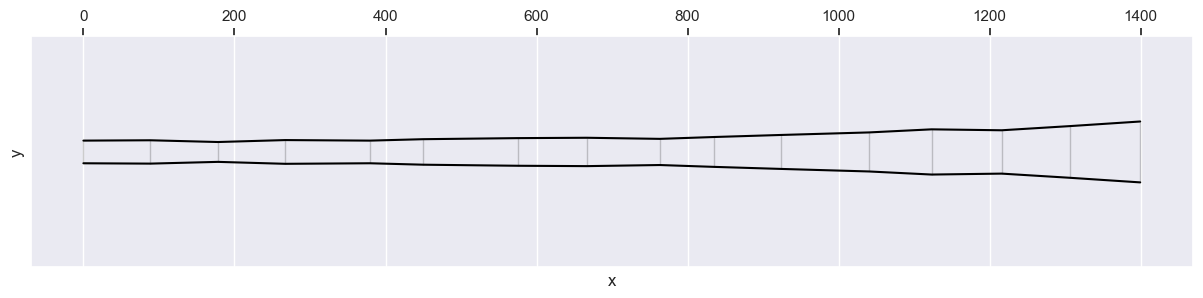

In [10]:
# shape

from cad.calc.parameters import MutationParameterSet, MutationParameter
from cad.ui.visualization import DidgeVisualizer
from cad.calc.mutation import ExploringMutator
import pandas as pd
import tqdm
import random

np.random.seed(0)
random.seed(0)
mutator = ExploringMutator()


class TamakiShape(MutationParameterSet):
    
    def __init__(self):
        
        MutationParameterSet.__init__(self)

        self.d1=30
        self.n_segments = 15

        self.add_param("length", 1380, 1400)
        self.add_param("bellsize", 77, 83)
        self.add_param("power", 1,2)
        
        for i in range(self.n_segments-1):
            self.add_param(f"delta_x{i}", -20, 20)
            self.add_param(f"delta_y{i}", 0.8, 1.2)
        

    def make_geo(self):
        length = self.get_value("length")
        bellsize = self.get_value("bellsize")

        x = length*np.arange(self.n_segments+1)/self.n_segments
    
        y= np.arange(self.n_segments+1)/self.n_segments
        p = self.get_value("power")
        y = np.power(y, p)
        y = np.power(y, p)
        y = np.power(y, p)
        y = self.d1 + y*(bellsize - self.d1)
        
        for i in range(1, self.n_segments-1):
            delta_x = self.get_value(f"delta_x{i}")
            delta_y = self.get_value(f"delta_y{i}")
            y[i] *= delta_y
            x[i] += delta_x
            x = sorted(x)
            
        geo = list(zip(x,y))
        
        return Geo(geo)

shape = BlackEucaShape()
for i in range(3):
    mutator.mutate(shape)
geo = shape.make_geo()
DidgeVisualizer.vis_didge(geo)

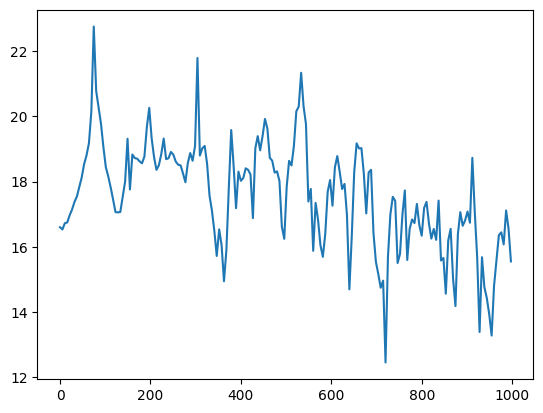

In [6]:
infile = "tamaki/tamaki_vorlage_short.wav"
freq, spectrum = do_fft(infile)
spectrum = np.log2(spectrum)
plt.plot(freq, spectrum)

# analyze computed shape



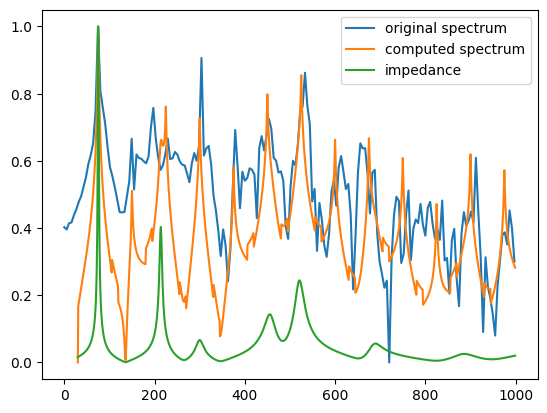

In [97]:
import json

indir = "/Users/jane03/workspaces/music/didge/evolutions/tamaki3/results/report_1/"
infile = indir + "0_geo.txt"
maveira = json.load(open(infile, "r"))
#[[0.0, 32.0], [83.35332871777914, 35.0162328995634], [177.9648752136909, 34.82690089056204], [281.83166112126344, 29.124969714659077], [367.35680173872487, 29.01183093695966], [475.301155472401, 30.081015724957382], [532.6586686684653, 46.784454958915724], [620.365614379913, 51.31551058009397], [712.8954813604888, 38.05346860949759], [814.2715130217262, 48.75212765476513], [921.0838306416952, 65.51753708883814], [1024.98881282807, 61.88195136143321], [1091.417201565728, 65.42744180973494], [1203.11178631251, 81.20715408526168], [1280.731228759826, 84.57169980021843], [1372.2120308140995, 93.08226266864497]]

cadsd = Geo(maveira).get_cadsd()

ground_spectrum = cadsd.get_ground_spektrum()

ground_freqs = np.array(list(ground_spectrum.keys()))
ground_vol = np.array(list(ground_spectrum.values()))
ground_vol /= ground_vol.max()

impedance_spektrum = cadsd.get_impedance_spektrum()
impedance_spektrum.impedance /= impedance_spektrum.impedance.max()

infile = "tamaki/tamaki_vorlage_short.wav"
freq, spectrum = do_fft(infile)
spectrum = np.log2(spectrum)

spectrum -= spectrum.min()
spectrum = spectrum / np.max(spectrum)

plt.plot(freq, spectrum, label="original spectrum")
plt.plot(ground_freqs, ground_vol, label="computed spectrum")
plt.plot(impedance_spektrum.freq, impedance_spektrum.impedance, label="impedance")
plt.legend()


In [16]:
cadsd.get_impedance_spektrum()

,freq,impedance
0,30,4.670842e+05
1,31,4.876884e+05
2,32,5.089474e+05
3,33,5.309130e+05
4,34,5.536422e+05
...,...,...
965,995,2.777066e+06
966,996,2.828108e+06
967,997,2.871941e+06
968,998,2.907337e+06


In [2]:
!ls tamaki

tamaki_vorlage.mp3       tamaki_vorlage_short.wav


In [102]:
volumes=[]
files=[]
for f in sorted(os.listdir(indir)):
    if f[-4:] != ".txt":
        continue
    path = os.path.join(indir, f)
    geo = json.load(open(path, "r"))
    
    vol = 0
    for i in np.arange(1, len(geo)):
        length = geo[i][0] - geo[i-1][0]
        vol += geo[i-1][1] * length
        vol += length * (geo[i][1]-geo[i-1][1]) / 2 
    
    files.append(f)
    volumes.append(vol)

sorted(range(len(files)), key=lambda x : volumes[x])


[3, 0, 4, 1, 8, 2, 9, 5, 7, 6]